imports

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
file = open('distance_color_type_for_all_stars.txt', 'r')
file_csv = open('distance_color_type_for_all_stars_new.csv', 'w')
remove_list = ['ASASSN','distance_pc=', 'J=', 'K=', 'MabsJ=', 'A_J=', 'A_K=', 'MLType=', 'VisType=', 'VSXType=', 'VSX_RA_Dec_Name=']
header = ['ASASSN_id', 'distance', 'distance_low', 'distance_high', 'J_mag', 'J_mag_err', 'K_mag', 'K_mag_err', 'abs_mag_J', 'abs_mag_J_low', 'abs_mag_J_high', 'ext_correct_J', 'ext_correct_J_low', 'ext_correct_J_high', 'ext_correct_K', 'ext_correct_K_low', 'ext_correct_K_high', 'ML_classifier_type', 'visual_classification_type', 'VSX_type', 'VSX_RA', 'VSX_Dec', 'VSX_name']

file_csv.write(','.join(header) + '\n')

lines = file.readlines()
for line in lines:
    line_split = line.split()
    if line_split[27][-1] == ',':
        line_split[27] = line_split[27][:-1]
    if len(line_split) > 34:
        line_split[33] = ' '.join(line_split[33:])
    del line_split[34:]
    for item in remove_list:
        if item in line_split:
            line_split.remove(item)

    print(line_split)
    file_csv.write(','.join(line_split) + '\n')

['8590948612', '3778', '3484', '4082', '12.151', '0.022', '11.815', '0.023', '-0.771', '-0.595', '-0.939', '0.036', '0.036', '0.036', '0.015', '0.015', '0.015', 'RRL_ab', 'NA', 'RRAB', '0.01521', '+35.36286', 'GM And']
['661428773073', '5833', '4946', '7076', '14.476', '0.033', '14.085', '0.066', '+0.625', '+0.983', '+0.205', '0.022', '0.022', '0.022', '0.009', '0.009', '0.009', 'RRL_ab', 'NA', 'RRAB', '0.01669', '+18.40698', 'CSS_J000004.0+182425']
['128850052915', '5463', '4555', '6859', '14.994', '0.052', '14.761', '0.124', '+1.264', '+1.659', '+0.770', '0.043', '0.043', '0.043', '0.019', '0.019', '0.019', 'RRL_ab', 'NA', 'RRAB', '0.03171', '+34.67397', 'SERIV 27']
['661427539170', '10226', '8430', '12243', '14.736', '0.044', '14.356', '0.091', '-0.335', '+0.085', '-0.725', '0.022', '0.022', '0.022', '0.009', '0.009', '0.009', 'RRL_ab', 'NA', 'RRAB', '0.06821', '-72.77875', 'BP Tuc']
['661428842978', '4131', '3828', '4440', '13.082', '0.031', '12.683', '0.027', '-0.099', '+0.066', '

In [93]:
color_csv = pd.read_csv('distance_color_type_for_all_stars_new.csv')

In [94]:
color_csv["visual_classification_type"].unique()

array([nan, 'RRC', 'constant', 'RRab', 'possibly', "I'd", 'EB', 'EW',
       'RR(B)', 'RRAB', 'BY', 'EA', 'SR:', 'SRA', 'const', 'SXPHE', 'RS',
       'RRC/EW', 'True', 'L', 'SRB', 'RRAB/CWB', 'RRd', 'needs', 'GDOR:',
       'DSCT', 'BY:', 'need', 'INS', 'probably', 'GDOR', 'corrupted',
       'likely', 'BY/DCEP', 'EW?'], dtype=object)

In [103]:
exclude_distance_99999 = color_csv[color_csv["distance"] < 99998]
exclude_distance_99999

ASASSN_id  distance  distance_low  distance_high   J_mag  J_mag_err  \
0        8590948612      3778          3484           4082  12.151      0.022   
1      661428773073      5833          4946           7076  14.476      0.033   
2      128850052915      5463          4555           6859  14.994      0.052   
3      661427539170     10226          8430          12243  14.736      0.044   
4      661428842978      4131          3828           4440  13.082      0.031   
...             ...       ...           ...            ...     ...        ...   
25393  472447133837      4426          4108           4813  13.445      0.025   
25394  283468348278      4310          3755           4843  14.001      0.027   
25395  601296002455      7238          6247           9348  14.337      0.032   
25396  644246075250      9021          7142          11992  14.853      0.039   
25397   94490254633      5823          5081           6654  14.196      0.035   

        K_mag  K_mag_err  abs_mag_J  abs_mag_J_low  ...  ext_correct_J_high  \
0      11.815      0.023     -0.771         -0.595  ...               0.036   
1      14.085      0.066      0.625          0.983  ...               0.022   
2      14.761      0.124      1.264          1.659  ...               0.043   
3      14.356      0.091     -0.335          0.085  ...               0.022   
4      12.683      0.027     -0.099          0.066  ...               0.101   
...       ...        ...        ...            ...  ...                 ...   
25393  13.195      0.031      0.215          0.377  ...               0.000   
25394  13.809      0.056      0.829          1.128  ...               0.000   
25395  14.078      0.069      0.039          0.359  ...               0.000   
25396  14.640      0.088      0.068          0.575  ...               0.009   
25397  13.776      0.050      0.298          0.594  ...               0.072   

       ext_correct_K  ext_correct_K_low  ext_correct_K_high  \
0              0.015              0.015               0.015   
1              0.009              0.009               0.009   
2              0.019              0.019               0.019   
3              0.009              0.009               0.009   
4              0.043              0.043               0.043   
...              ...                ...                 ...   
25393          0.000              0.000               0.000   
25394          0.000              0.000               0.000   
25395          0.000              0.000               0.000   
25396          0.004              0.004               0.004   
25397          0.031              0.031               0.031   

       ML_classifier_type  visual_classification_type  VSX_type     VSX_RA  \
0                  RRL_ab                         NaN      RRAB    0.01521   
1                  RRL_ab                         NaN      RRAB    0.01669   
2                  RRL_ab                         NaN      RRAB    0.03171   
3                  RRL_ab                         NaN      RRAB    0.06821   
4                  RRL_ab                         NaN      RRAB    0.09900   
...                   ...                         ...       ...        ...   
25393              NonVar                         NaN       RRC  359.93546   
25394               RRL_c                         NaN       RRC  359.93652   
25395                DSCT                         NaN       RRC  359.93862   
25396              NonVar                         NaN      RRAB  359.94269   
25397               RRL_c                         NaN       RRC  359.94528   

        VSX_Dec                      VSX_name  
0      35.36286                        GM And  
1      18.40698          CSS_J000004.0+182425  
2      34.67397                      SERIV 27  
3     -72.77875                        BP Tuc  
4      36.32870                  NSVS 6313844  
...         ...                           ...  
25393  17.65683           ASAS J235945+1739.5  
25394 -11.

In [104]:
K_mag_clean_1 = exclude_distance_99999[(exclude_distance_99999["K_mag"] != 99.999)]
K_mag_clean_2 = K_mag_clean_1[K_mag_clean_1["K_mag"] > 1]

K_mag_clean_2

ASASSN_id  distance  distance_low  distance_high   J_mag  J_mag_err  \
0        8590948612      3778          3484           4082  12.151      0.022   
1      661428773073      5833          4946           7076  14.476      0.033   
2      128850052915      5463          4555           6859  14.994      0.052   
3      661427539170     10226          8430          12243  14.736      0.044   
4      661428842978      4131          3828           4440  13.082      0.031   
...             ...       ...           ...            ...     ...        ...   
25393  472447133837      4426          4108           4813  13.445      0.025   
25394  283468348278      4310          3755           4843  14.001      0.027   
25395  601296002455      7238          6247           9348  14.337      0.032   
25396  644246075250      9021          7142          11992  14.853      0.039   
25397   94490254633      5823          5081           6654  14.196      0.035   

        K_mag  K_mag_err  abs_mag_J  abs_mag_J_low  ...  ext_correct_J_high  \
0      11.815      0.023     -0.771         -0.595  ...               0.036   
1      14.085      0.066      0.625          0.983  ...               0.022   
2      14.761      0.124      1.264          1.659  ...               0.043   
3      14.356      0.091     -0.335          0.085  ...               0.022   
4      12.683      0.027     -0.099          0.066  ...               0.101   
...       ...        ...        ...            ...  ...                 ...   
25393  13.195      0.031      0.215          0.377  ...               0.000   
25394  13.809      0.056      0.829          1.128  ...               0.000   
25395  14.078      0.069      0.039          0.359  ...               0.000   
25396  14.640      0.088      0.068          0.575  ...               0.009   
25397  13.776      0.050      0.298          0.594  ...               0.072   

       ext_correct_K  ext_correct_K_low  ext_correct_K_high  \
0              0.015              0.015               0.015   
1              0.009              0.009               0.009   
2              0.019              0.019               0.019   
3              0.009              0.009               0.009   
4              0.043              0.043               0.043   
...              ...                ...                 ...   
25393          0.000              0.000               0.000   
25394          0.000              0.000               0.000   
25395          0.000              0.000               0.000   
25396          0.004              0.004               0.004   
25397          0.031              0.031               0.031   

       ML_classifier_type  visual_classification_type  VSX_type     VSX_RA  \
0                  RRL_ab                         NaN      RRAB    0.01521   
1                  RRL_ab                         NaN      RRAB    0.01669   
2                  RRL_ab                         NaN      RRAB    0.03171   
3                  RRL_ab                         NaN      RRAB    0.06821   
4                  RRL_ab                         NaN      RRAB    0.09900   
...                   ...                         ...       ...        ...   
25393              NonVar                         NaN       RRC  359.93546   
25394               RRL_c                         NaN       RRC  359.93652   
25395                DSCT                         NaN       RRC  359.93862   
25396              NonVar                         NaN      RRAB  359.94269   
25397               RRL_c                         NaN       RRC  359.94528   

        VSX_Dec                      VSX_name  
0      35.36286                        GM And  
1      18.40698          CSS_J000004.0+182425  
2      34.67397                      SERIV 27  
3     -72.77875                        BP Tuc  
4      36.32870                  NSVS 6313844  
...         ...                           ...  
25393  17.65683           ASAS J235945+1739.5  
25394 -11.

In [105]:
K_mag_clean_2[K_mag_clean_2["J_mag"] < 5]

ASASSN_id  distance  distance_low  distance_high  J_mag  J_mag_err  \
2432  360777491963       853           826            877  4.855      0.270   
2448  352187614364       803           790            816  4.912      0.284   
3229  326418362574      1824          1646           2016  4.857      0.037   
3252  403727859610      1727          1636           1839  3.675      0.216   
3274  515396669551       843           828            859  4.417      0.270   
3379  644245156306       892           873            913  4.903      0.284   
3399  644245174372       814           797            829  4.854      0.262   

      K_mag  K_mag_err  abs_mag_J  abs_mag_J_low  ...  ext_correct_J_high  \
2432  3.379      0.228     -4.974         -4.904  ...               0.174   
2448  3.536      0.262     -4.673         -4.637  ...               0.062   
3229  3.595      0.242     -6.499         -6.276  ...               0.051   
3252  2.312      0.238     -7.511         -7.394  ...               0.000   
3274  3.069      0.278     -5.340         -5.300  ...               0.129   
3379  3.589      0.262     -4.849         -4.802  ...               0.000   
3399  3.393      0.260     -4.721         -4.675  ...               0.022   

      ext_correct_K  ext_correct_K_low  ext_correct_K_high  \
2432          0.074              0.074               0.074   
2448          0.026              0.026               0.026   
3229          0.022              0.022               0.022   
3252          0.000              0.000               0.000   
3274          0.055              0.055               0.056   
3379          0.000              0.000               0.000   
3399          0.009              0.009               0.009   

      ML_classifier_type  visual_classification_type  \
2432       LPV_SRV_AGB_O                         NaN   
2448              NonVar                         NaN   
3229       LPV_SRV_AGB_C                         NaN   
3252              NonVar                         NaN   
3274              NonVar                         NaN   
3379              NonVar                         NaN   
3399              NonVar                         NaN   

                      VSX_type     VSX_RA   VSX_Dec             VSX_name  
2432                 MISC|RRAB   99.81979  -7.12675  ASAS J063917-0707.6  
2448                 MISC|RRAB  100.23125 -42.60208  ASAS J064056-4236.1  
3229         MISC|RRAB|DCEP-FO  120.75500 -24.69261  ASAS J080301-2441.5  
3252                 MISC|RRAB  121.34938 -17.10303  ASAS J080524-1706.2  
3274  MISC|RRAB|DCEP-FO|ESD|ED  121.69021 -61.69261  ASAS J080646-6141.6  
3379  MISC|RRAB|DCEP-FO|EC|ESD  124.01675 -27.98483  ASAS J081604-2759.1  
3399          MISC|RRAB|ESD|ED  124.50063 -27.57769  ASAS J081800-2734.7  

[7 rows x 23 columns]

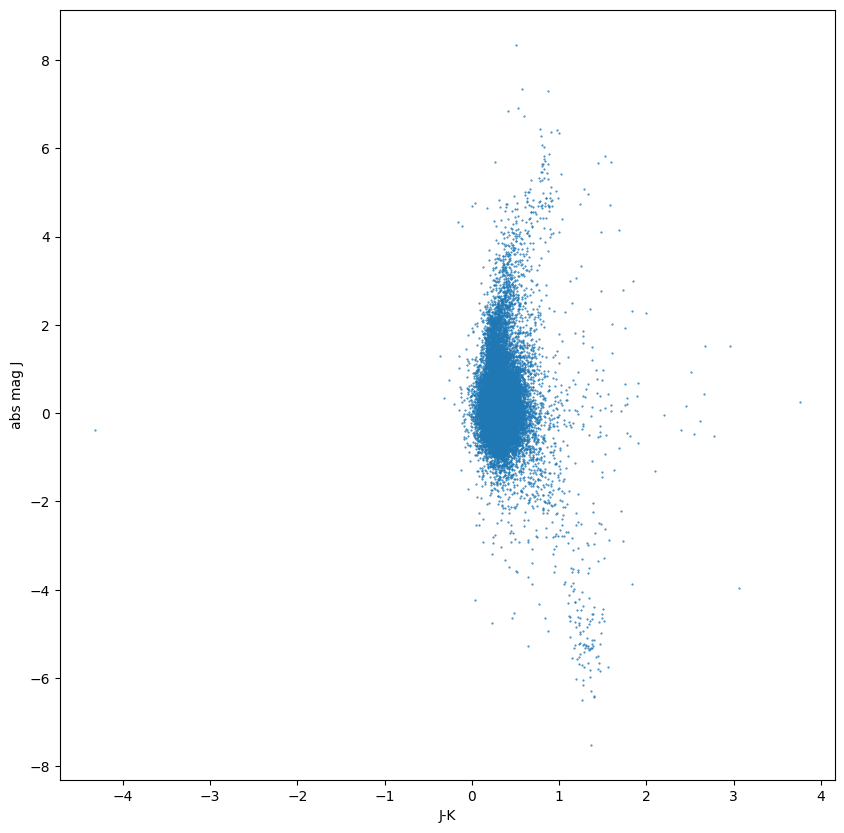

In [106]:
plt.figure(figsize=(10, 10))

plt.scatter(K_mag_clean_2["J_mag"] - K_mag_clean_2["K_mag"], K_mag_clean_2["abs_mag_J"], marker='.', s=1, alpha = 0.95)
plt.xlabel("J-K")
plt.ylabel("abs mag J")
plt.show()